### Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

### Read data in

In [2]:
df = pd.read_csv('vehicles.csv')

### Initial EDA

In [3]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [4]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

In [5]:
100 * df.isnull().sum() / len(df)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.256281
manufacturer      4.760135
model             1.422282
condition        42.860257
cylinders        38.174689
fuel              0.686247
odometer         17.241751
title_status      0.414364
transmission      0.492372
vin              45.119296
drive            27.993869
size             67.904481
type             26.868939
paint_color      31.030701
image_url         0.005506
description       0.006195
county          100.000000
state             0.000000
lat               1.889416
long              1.889416
dtype: float64

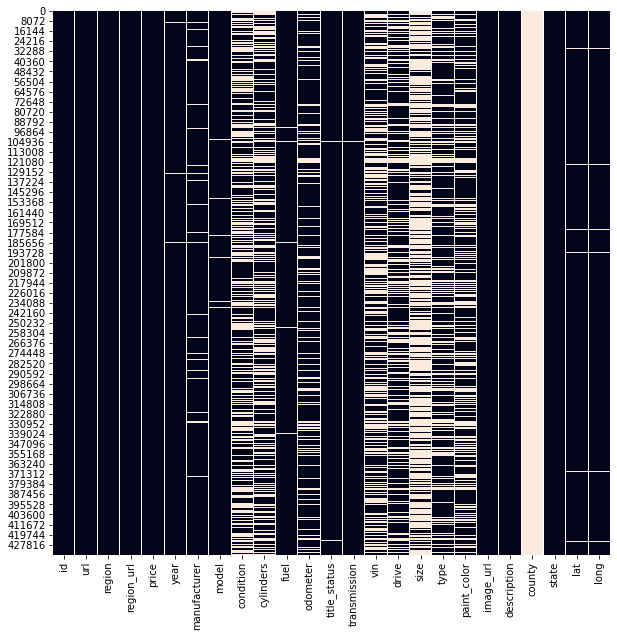

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cbar=False);

In [7]:
df['manufacturer'].unique()

array(['jeep', 'bmw', 'dodge', 'chevrolet', nan, 'ford', 'ram', 'honda',
       'toyota', 'nissan', 'subaru', 'gmc', 'volkswagen', 'kia', 'acura',
       'chrysler', 'hyundai', 'cadillac', 'volvo', 'mini',
       'mercedes-benz', 'audi', 'mazda', 'pontiac', 'buick', 'infiniti',
       'mitsubishi', 'rover', 'lincoln', 'lexus', 'fiat', 'jaguar',
       'mercury', 'saturn', 'datsun', 'porche', 'tesla',
       'harley-davidson', 'ferrari', 'land rover', 'alfa-romeo', 'morgan',
       'aston-martin'], dtype=object)

In [8]:
df.year.describe()

count    434732.000000
mean       2009.866460
std           9.312503
min        1900.000000
25%        2007.000000
50%        2012.000000
75%        2015.000000
max        2021.000000
Name: year, dtype: float64

In [9]:
df.odometer.describe()

count    3.607010e+05
mean     9.897590e+04
std      1.134990e+05
min      0.000000e+00
25%      4.733300e+04
50%      9.118800e+04
75%      1.347360e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [10]:
df_clean = df.copy() #make copy of dataframe to use for our cleaned data

### Imputing Manufacturer from Description

In [11]:
for i in list(df_clean['manufacturer'].unique()):
#     print (f'(df_clean["description"].str.contains("{i}", case = False)) & (df_clean["manufacturer"].isnull()),')
    print(f'"{i}",')

"jeep",
"bmw",
"dodge",
"chevrolet",
"nan",
"ford",
"ram",
"honda",
"toyota",
"nissan",
"subaru",
"gmc",
"volkswagen",
"kia",
"acura",
"chrysler",
"hyundai",
"cadillac",
"volvo",
"mini",
"mercedes-benz",
"audi",
"mazda",
"pontiac",
"buick",
"infiniti",
"mitsubishi",
"rover",
"lincoln",
"lexus",
"fiat",
"jaguar",
"mercury",
"saturn",
"datsun",
"porche",
"tesla",
"harley-davidson",
"ferrari",
"land rover",
"alfa-romeo",
"morgan",
"aston-martin",


In [12]:
condition = [
(df_clean["description"].str.contains("jeep", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("bmw", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("dodge", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("chevrolet", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("ford", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("honda", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("toyota", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("nissan", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("subaru", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("gmc", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("volkswagen", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("kia", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("acura", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("ram", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("chrysler", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("hyundai", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("cadillac", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("volvo", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("mini", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("mercedes-benz", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("nan", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("audi", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("mazda", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("pontiac", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("buick", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("infiniti", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("mitsubishi", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("rover", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("lincoln", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("lexus", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("fiat", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("jaguar", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("mercury", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("saturn", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("datsun", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("porche", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("tesla", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("harley-davidson", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("land rover", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("alfa-romeo", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("ferrari", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("morgan", case = False)) & (df_clean["manufacturer"].isnull()),
(df_clean["description"].str.contains("aston-martin", case = False)) & (df_clean["manufacturer"].isnull())
    
]
choice = [
            "jeep",
            "bmw",
            "dodge",
            "chevrolet",
            "ford",
            "honda",
            "toyota",
            "nissan",
            "subaru",
            "gmc",
            "volkswagen",
            "kia",
            "acura",
            "ram",
            "chrysler",
            "hyundai",
            "cadillac",
            "volvo",
            "mini",
            "mercedes-benz",
            "nan",
            "audi",
            "mazda",
            "pontiac",
            "buick",
            "infiniti",
            "mitsubishi",
            "rover",
            "lincoln",
            "lexus",
            "fiat",
            "jaguar",
            "mercury",
            "saturn",
            "datsun",
            "porche",
            "tesla",
            "harley-davidson",
            "land rover",
            "alfa-romeo",
            "ferrari",
            "morgan",
            "aston-martin"
]
df_clean['manufacturer'] = np.select(condition, choice, default = df_clean['manufacturer'])

In [13]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer      8372
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

### Imputing Odometer Values (Thanks Alec)

In [14]:
df[df['odometer'] > 300000]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
267,7120302677,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,0,1996.0,ford,f-250,NaN,8 cylinders,diesel,340272.0,clean,manual,1FTHX26F4TEA74745,4wd,NaN,truck,NaN,https://images.craigslist.org/00K0K_3wneG97zmf...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250
932,7121507543,https://phoenix.craigslist.org/evl/cto/d/mesa-...,phoenix,https://phoenix.craigslist.org,1500,2007.0,ford,focus,good,4 cylinders,gas,330000.0,clean,automatic,NaN,fwd,compact,sedan,black,https://images.craigslist.org/00n0n_h6JcY0dnjE...,"Body excellent, interior excellent. Electric s...",NaN,az,33.3848,-111.8970
1002,7111631846,https://rapidcity.craigslist.org/ctd/d/windom-...,rapid city / west SD,https://rapidcity.craigslist.org,14950,2015.0,NaN,ISUZU NRR,excellent,4 cylinders,diesel,300990.0,clean,automatic,JALE5W160F7302514,NaN,full-size,truck,white,https://images.craigslist.org/00101_a5nwKAiTlM...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2015 ISUZU ...,NaN,sd,43.8634,-95.1139
1053,7111563446,https://rapidcity.craigslist.org/ctd/d/windom-...,rapid city / west SD,https://rapidcity.craigslist.org,9950,2005.0,ford,excursion,good,8 cylinders,diesel,302724.0,clean,automatic,1FMSU45P45EB76677,4wd,full-size,SUV,blue,https://images.craigslist.org/01010_gBwSj7m7ll...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2005 FORD E...,NaN,sd,43.8633,-95.1138
1157,7121484986,https://phoenix.craigslist.org/nph/cto/d/phoen...,phoenix,https://phoenix.craigslist.org,9500,1994.0,NaN,freightliner fld120,good,6 cylinders,diesel,400000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/01313_87b6MXOX7S...,1994 freightliner FlD120 New steer Tirs 10 sp...,NaN,az,33.6299,-112.1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434587,7109287314,https://richmond.craigslist.org/ctd/d/greensbo...,richmond,https://richmond.craigslist.org,0,2013.0,NaN,PETERBILT 389,NaN,NaN,diesel,714915.0,clean,manual,1XPXD49X7DD197000,NaN,NaN,NaN,NaN,https://images.craigslist.org/00x0x_f9Jlh6mMKV...,Piedmont Peterbilt Internet Sales at 336-203-8...,NaN,va,36.0334,-79.8626
434815,7121452118,https://flagstaff.craigslist.org/cto/d/flagsta...,flagstaff / sedona,https://flagstaff.craigslist.org,3100,2007.0,toyota,prius hybrid,good,4 cylinders,hybrid,308000.0,clean,automatic,NaN,fwd,compact,hatchback,red,https://images.craigslist.org/00Y0Y_dgt8zIdQQH...,Everything works as it should A/c = COLD Heate...,NaN,az,35.1859,-111.6620
435297,7117495221,https://medford.craigslist.org/ctd/d/gladstone...,medford-ashland,https://medford.craigslist.org,0,1999.0,ram,2500 laramie slt long,excellent,6 cylinders,diesel,352781.0,clean,automatic,1B7KF2366XJ569670,4wd,full-size,truck,blue,https://images.craigslist.org/00Y0Y_4t9sTDdkC5...,Carz Planet STOCK #: 6498 💲 💲 FOR...,NaN,or,45.3860,-122.6080
435728,7119682628,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,5900,1999.0,gmc,t6500,NaN,NaN,diesel,320000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00n0n_5EsIro50yr...,GMC T6500 Stake Bed. 320k miles. CAT Diesel. E...,NaN,az,34.4814,-114.3480


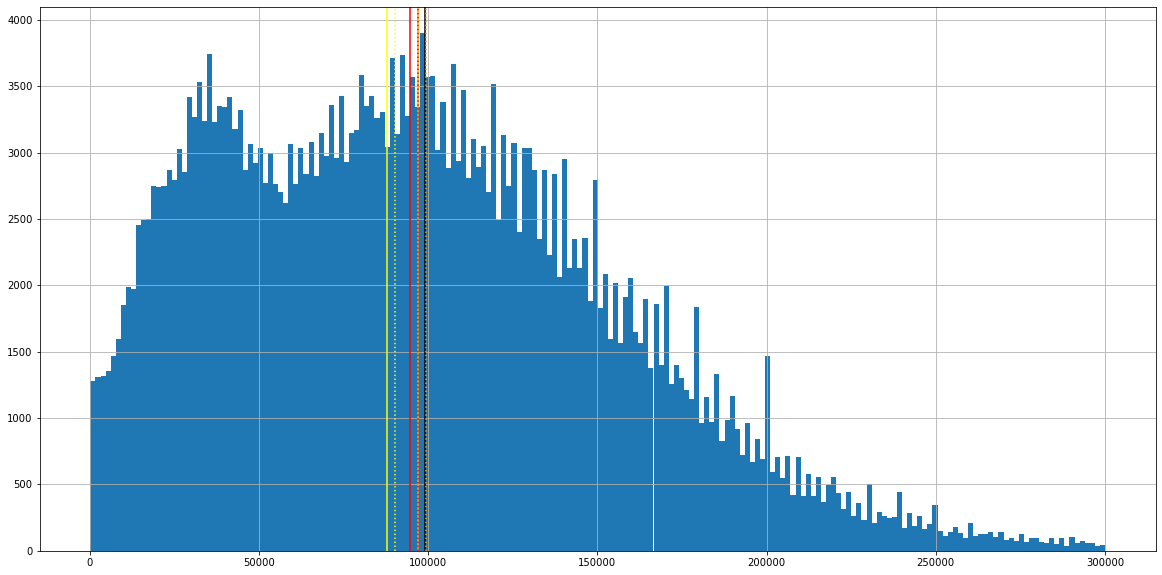

In [15]:
plt.figure(figsize = (20,10))
df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['odometer'].hist(bins = 200)
plt.axvline(df['odometer'].mean(), color = 'black')
plt.axvline(df[df['odometer'] < 1000000]['odometer'].mean(), color = 'orange')
plt.axvline(df[df['odometer'] < 300000]['odometer'].mean(), color = 'red')
plt.axvline(df[df['odometer'] < 200000]['odometer'].mean(), color = 'yellow')
plt.axvline(df[(df['odometer'] < 1000000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'orange', ls = ':')
plt.axvline(df[(df['odometer'] < 300000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'red', ls = ':')
plt.axvline(df[(df['odometer'] < 200000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'yellow', ls = ':')

In [16]:
bins = np.arange(df['year'].min(), df['year'].max(), 10)
bins = np.append(bins, 2021)
groups = pd.cut(df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['year'], bins, include_lowest=True)

In [17]:
od_avgs = []
for i in range(1000):
    od_avgs.append(sum(random.sample(list(df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['odometer']), 1000)) / 1000)
od_avg = sum(od_avgs) / 1000
od_avg

96847.15636400011

In [18]:
((df_clean['description'].str.contains('ford', case = False)) & (df_clean['manufacturer'].isnull())).sum()

0

In [19]:
df_clean['age'] = 2022-df_clean['year']

In [20]:
df_clean['miles_per_year'] = df_clean['odometer'] / df_clean['age']

In [21]:
estimated_annual_mileage = dict(df_clean.groupby(['manufacturer'])['miles_per_year'].median())
estimated_annual_mileage

{'acura': 9127.358299595142,
 'alfa-romeo': 3649.0,
 'aston-martin': 1642.857142857143,
 'audi': 8328.125,
 'bmw': 7699.78947368421,
 'buick': 7519.818181818182,
 'cadillac': 8316.5,
 'chevrolet': 9250.0,
 'chrysler': 9367.083333333334,
 'datsun': 1752.375,
 'dodge': 9461.625,
 'ferrari': 1753.0202020202019,
 'fiat': 5902.777777777777,
 'ford': 9618.333333333334,
 'gmc': 9873.78947368421,
 'harley-davidson': 3166.6666666666665,
 'honda': 9331.5,
 'hyundai': 9196.833333333334,
 'infiniti': 8643.066666666668,
 'jaguar': 5545.454545454545,
 'jeep': 8437.5,
 'kia': 9335.222222222223,
 'land rover': 7631.3,
 'lexus': 8562.470588235294,
 'lincoln': 8270.375,
 'mazda': 8110.142857142857,
 'mercedes-benz': 7467.666666666667,
 'mercury': 7755.555555555556,
 'mini': 7027.8125,
 'mitsubishi': 7947.222222222223,
 'morgan': 18997.4,
 'nan': 7428.571428571428,
 'nissan': 9209.166666666666,
 'pontiac': 7543.738095238095,
 'porche': 2352.9411764705883,
 'ram': 9754.222222222223,
 'rover': 8578.6958041

In [22]:
df_clean['estimated_odometer'] = df_clean['manufacturer'].map(estimated_annual_mileage) * df_clean['age']

In [23]:
conditions = [~df_clean['odometer'].isna(),
             df_clean['odometer'].isna()]

choices = [df_clean['odometer'],
          df_clean['estimated_odometer']]

df_clean['odometer'] = np.select(conditions, choices, default = np.nan)

df_clean.drop(['estimated_odometer'],axis=1,inplace=True)

df_clean.drop(['miles_per_year'],axis=1,inplace=True)

In [24]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer      8372
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer          3893
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
age               1117
dtype: int64

In [25]:
od_decade_means = df[(df['odometer'] < 300000) & (df['odometer'] > 250)].groupby(groups)['odometer'].agg(['mean', 'size']).head(500)

In [26]:
od_decade_means

,mean,size
year,,
"(1899.999, 1910.0]",86779.000000,1
"(1910.0, 1920.0]",7675.000000,6
"(1920.0, 1930.0]",34051.344828,58
"(1930.0, 1940.0]",24165.683761,117
"(1940.0, 1950.0]",41519.645833,144
"(1950.0, 1960.0]",49592.645892,353
"(1960.0, 1970.0]",59458.211575,1054
"(1970.0, 1980.0]",70270.250165,1511
"(1980.0, 1990.0]",105626.272727,2442


In [27]:
conditions = [
                (df['year'] <= 1910) & (df['odometer'].isnull()),
                (df['year'] > 1910) & (df['year'] <= 1920) & (df['odometer'].isnull()),
                (df['year'] > 1920) & (df['year'] <= 1930) & (df['odometer'].isnull()),
                (df['year'] > 1930) & (df['year'] <= 1940) & (df['odometer'].isnull()),
                (df['year'] > 1940) & (df['year'] <= 1950) & (df['odometer'].isnull()),
                (df['year'] > 1950) & (df['year'] <= 1960) & (df['odometer'].isnull()),
                (df['year'] > 1960) & (df['year'] <= 1970) & (df['odometer'].isnull()),
                (df['year'] > 1970) & (df['year'] <= 1980) & (df['odometer'].isnull()),
                (df['year'] > 1980) & (df['year'] <= 1990) & (df['odometer'].isnull()),
                (df['year'] > 1990) & (df['year'] <= 2000) & (df['odometer'].isnull()),
                (df['year'] > 2000) & (df['year'] <= 2010) & (df['odometer'].isnull()),
                (df['year'] > 2010) & (df['year'] <= 2020) & (df['odometer'].isnull()),
                (df['year'] > 2020) & (df['odometer'].isnull())
]

choices = [
            int(od_decade_means.iloc[0,0]),
            int(od_decade_means.iloc[1,0]),
            int(od_decade_means.iloc[2,0]),
            int(od_decade_means.iloc[3,0]),
            int(od_decade_means.iloc[4,0]),
            int(od_decade_means.iloc[5,0]),
            int(od_decade_means.iloc[6,0]),
            int(od_decade_means.iloc[7,0]),
            int(od_decade_means.iloc[8,0]),
            int(od_decade_means.iloc[9,0]),
            int(od_decade_means.iloc[10,0]),
            int(od_decade_means.iloc[11,0]),
            int(od_decade_means.iloc[12,0])
]

df_clean['odometer'] = np.select(conditions, choices, default = df['odometer'])

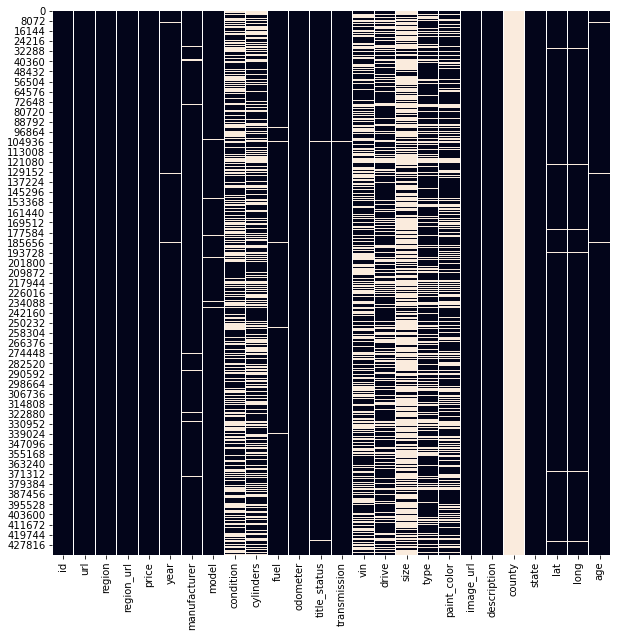

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(df_clean.isnull(), cbar=False);

### Impute Paint Color

In [29]:
paint_color_probs_dict = df_clean.groupby(by = ['manufacturer'])['paint_color'].value_counts(normalize = True).unstack().to_dict('index')

In [30]:
paint_color_probs_dict

{'acura': {'black': 0.24328593996840442,
  'blue': 0.06714060031595577,
  'brown': 0.0169826224328594,
  'custom': 0.02330173775671406,
  'green': 0.013033175355450236,
  'grey': 0.17377567140600317,
  'orange': 0.001184834123222749,
  'purple': 0.0007898894154818325,
  'red': 0.045813586097946286,
  'silver': 0.18996840442338073,
  'white': 0.22472353870458137,
  'yellow': nan},
 'alfa-romeo': {'black': 0.18181818181818182,
  'blue': 0.09090909090909091,
  'brown': nan,
  'custom': nan,
  'green': 0.05454545454545454,
  'grey': 0.10909090909090909,
  'orange': nan,
  'purple': nan,
  'red': 0.2545454545454545,
  'silver': 0.03636363636363636,
  'white': 0.2545454545454545,
  'yellow': 0.01818181818181818},
 'aston-martin': {'black': 0.22727272727272727,
  'blue': 0.13636363636363635,
  'brown': nan,
  'custom': 0.045454545454545456,
  'green': 0.22727272727272727,
  'grey': 0.045454545454545456,
  'orange': nan,
  'purple': nan,
  'red': 0.045454545454545456,
  'silver': 0.27272727272

In [31]:
rand_choice_paint_color_probs_dict = {}
for i in paint_color_probs_dict:
    colors_list = []
    probs_list = []
    for j in paint_color_probs_dict[i]: 
        if paint_color_probs_dict[i][j] > 0:
            colors_list.append(j)
            probs_list.append(paint_color_probs_dict[i][j])
#             temp_dict[j] = paint_color_probs_dict[i][j]
    rand_choice_paint_color_probs_dict[i] = {'colors': colors_list, 'probabilities': probs_list}
all_probs = df_clean['paint_color'].value_counts(normalize = True)
rand_choice_paint_color_probs_dict['all'] = {'colors': list(all_probs.index), 'probabilities': list(all_probs.values)}                           
rand_choice_paint_color_probs_dict

{'acura': {'colors': ['black',
   'blue',
   'brown',
   'custom',
   'green',
   'grey',
   'orange',
   'purple',
   'red',
   'silver',
   'white'],
  'probabilities': [0.24328593996840442,
   0.06714060031595577,
   0.0169826224328594,
   0.02330173775671406,
   0.013033175355450236,
   0.17377567140600317,
   0.001184834123222749,
   0.0007898894154818325,
   0.045813586097946286,
   0.18996840442338073,
   0.22472353870458137]},
 'alfa-romeo': {'colors': ['black',
   'blue',
   'green',
   'grey',
   'red',
   'silver',
   'white',
   'yellow'],
  'probabilities': [0.18181818181818182,
   0.09090909090909091,
   0.05454545454545454,
   0.10909090909090909,
   0.2545454545454545,
   0.03636363636363636,
   0.2545454545454545,
   0.01818181818181818]},
 'aston-martin': {'colors': ['black',
   'blue',
   'custom',
   'green',
   'grey',
   'red',
   'silver'],
  'probabilities': [0.22727272727272727,
   0.13636363636363635,
   0.045454545454545456,
   0.22727272727272727,
   0.04545

In [32]:
def rand_paint(row):
    key = row['manufacturer']
    if (type(row['paint_color']) == float) & (type(key) != float):
        return np.random.choice(rand_choice_paint_color_probs_dict[key]['colors'], 1, p=rand_choice_paint_color_probs_dict[key]['probabilities'])[0]
    elif (type(key) == float):
        return np.random.choice(rand_choice_paint_color_probs_dict['all']['colors'], 1, p=rand_choice_paint_color_probs_dict['all']['probabilities'])[0]
    return row['paint_color']


df_clean['paint_color'] = df_clean.apply(lambda x: rand_paint(x), axis = 1)

In [33]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer      8372
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer            25
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color          0
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
age               1117
dtype: int64

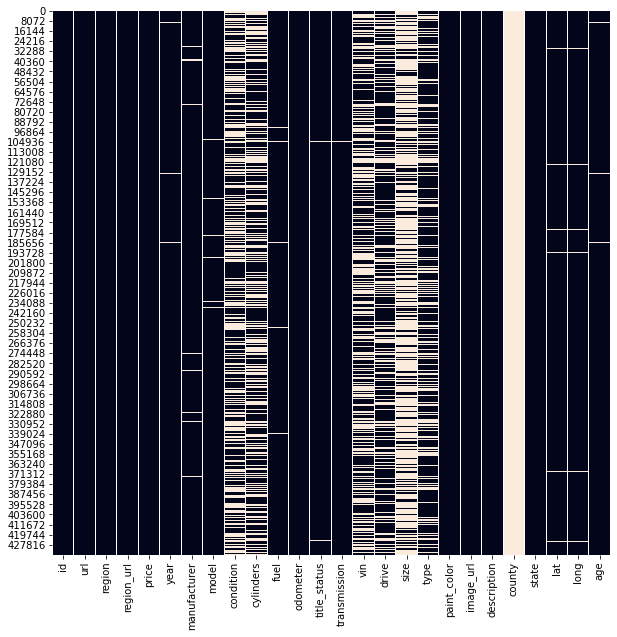

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(df_clean.isnull(), cbar=False);

In [35]:
final_paint_color_probs_dict = df_clean.groupby(by = ['manufacturer'])['paint_color'].value_counts(normalize = True).unstack().to_dict('index')

In [36]:
final_paint_color_probs_dict

{'acura': {'black': 0.2460431654676259,
  'blue': 0.06935251798561151,
  'brown': 0.015827338129496403,
  'custom': 0.022158273381294964,
  'green': 0.01553956834532374,
  'grey': 0.1743884892086331,
  'orange': 0.0008633093525179857,
  'purple': 0.0005755395683453237,
  'red': 0.04402877697841727,
  'silver': 0.18762589928057555,
  'white': 0.22359712230215828,
  'yellow': nan},
 'alfa-romeo': {'black': 0.16417910447761194,
  'blue': 0.07462686567164178,
  'brown': nan,
  'custom': nan,
  'green': 0.04477611940298507,
  'grey': 0.08955223880597014,
  'orange': nan,
  'purple': nan,
  'red': 0.2835820895522388,
  'silver': 0.029850746268656716,
  'white': 0.29850746268656714,
  'yellow': 0.014925373134328358},
 'aston-martin': {'black': 0.20588235294117646,
  'blue': 0.14705882352941177,
  'brown': nan,
  'custom': 0.029411764705882353,
  'green': 0.2647058823529412,
  'grey': 0.029411764705882353,
  'orange': nan,
  'purple': nan,
  'red': 0.058823529411764705,
  'silver': 0.264705882

Checking that the percentages of car colors stayed relatively the same before and after imputing

In [37]:
paint_color_probs_dict

{'acura': {'black': 0.24328593996840442,
  'blue': 0.06714060031595577,
  'brown': 0.0169826224328594,
  'custom': 0.02330173775671406,
  'green': 0.013033175355450236,
  'grey': 0.17377567140600317,
  'orange': 0.001184834123222749,
  'purple': 0.0007898894154818325,
  'red': 0.045813586097946286,
  'silver': 0.18996840442338073,
  'white': 0.22472353870458137,
  'yellow': nan},
 'alfa-romeo': {'black': 0.18181818181818182,
  'blue': 0.09090909090909091,
  'brown': nan,
  'custom': nan,
  'green': 0.05454545454545454,
  'grey': 0.10909090909090909,
  'orange': nan,
  'purple': nan,
  'red': 0.2545454545454545,
  'silver': 0.03636363636363636,
  'white': 0.2545454545454545,
  'yellow': 0.01818181818181818},
 'aston-martin': {'black': 0.22727272727272727,
  'blue': 0.13636363636363635,
  'brown': nan,
  'custom': 0.045454545454545456,
  'green': 0.22727272727272727,
  'grey': 0.045454545454545456,
  'orange': nan,
  'purple': nan,
  'red': 0.045454545454545456,
  'silver': 0.27272727272

### Dropping columns that didn't have a year or odometer value

difficult to impute accurately when they are both heavily correlated to the other and are both missing

In [38]:
df_clean[df_clean['odometer'].isnull()][['year', 'odometer']] #some cars have no year and odometer value

,year,odometer
28526,NaN,NaN
40969,NaN,NaN
74356,NaN,NaN
74400,NaN,NaN
80723,NaN,NaN
87185,NaN,NaN
87528,NaN,NaN
87633,NaN,NaN
89520,NaN,NaN
92583,NaN,NaN


In [39]:
df_clean.dropna(subset = ['year'], inplace = True) # get rid of the 25 rows that have no value for year and odometer

### Change VIN to a categorical value

In [40]:
df_clean['vin'] = df_clean['vin'].apply(lambda x: 0 if type(x) == float else 1) #replace vin column with binary yes/no column

In [41]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      8346
model             6173
condition       185692
cylinders       166352
fuel              2734
odometer             0
title_status      1583
transmission      2122
vin                  0
drive           121823
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
age                  0
dtype: int64

### Imputing fuel

In [42]:
condition = [
                (df_clean['description'].str.contains('diesel', case = False)) & (df_clean['fuel'].isnull()),
                (df_clean['description'].str.contains('hybrid', case = False)) & (df_clean['fuel'].isnull()),
                (df_clean['description'].str.contains('electric', case = False)) & (df_clean['fuel'].isnull())
]
choice = [
            'diesel',
            'hybrid',
            'electric'
]
df_clean['fuel'] = np.select(condition, choice, default = df_clean['fuel'])

In [43]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      8346
model             6173
condition       185692
cylinders       166352
fuel              2176
odometer             0
title_status      1583
transmission      2122
vin                  0
drive           121823
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
age                  0
dtype: int64

### Imputing the Drive type

In [44]:
df_clean['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [45]:
condition = [
                (df_clean['description'].str.contains('4wd', case = False)) & (df_clean['drive'].isnull()),
                (df_clean['description'].str.contains('fwd', case = False)) & (df_clean['drive'].isnull()),
                (df_clean['description'].str.contains('rwd', case = False)) & (df_clean['drive'].isnull())
]
choice = [
            '4wd',
            'fwd',
            'rwd'
]
df_clean['drive'] = np.select(condition, choice, default = df_clean['drive'])

In [46]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      8346
model             6173
condition       185692
cylinders       166352
fuel              2176
odometer             0
title_status      1583
transmission      2122
vin                  0
drive           101348
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
age                  0
dtype: int64

In [47]:
drive_dict = df_clean.groupby(by = ['manufacturer'])['drive'].value_counts(normalize = True).unstack().to_dict('index')

In [48]:
rand_choice_drive_probs_dict = {}
for i in drive_dict:
    drive_list = []
    probs_list = []
    for j in drive_dict[i]: 
        if drive_dict[i][j] > 0:
            drive_list.append(j)
            probs_list.append(drive_dict[i][j])
    rand_choice_drive_probs_dict[i] = {'drive': drive_list, 'probabilities': probs_list}
all_probs = df_clean['drive'].value_counts(normalize = True)
rand_choice_drive_probs_dict['all'] = {'drive': list(all_probs.index), 'probabilities': list(all_probs.values)}                           
rand_choice_drive_probs_dict

{'acura': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.37490165224232885,
   0.6038552321007081,
   0.021243115656963022]},
 'alfa-romeo': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.26785714285714285,
   0.08928571428571429,
   0.6428571428571429]},
 'aston-martin': {'drive': ['rwd'], 'probabilities': [1.0]},
 'audi': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.7837423312883436,
   0.18312883435582822,
   0.033128834355828224]},
 'bmw': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.4036666666666667,
   0.028555555555555556,
   0.5677777777777778]},
 'buick': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.18330087633885103,
   0.7641187925998053,
   0.05258033106134372]},
 'cadillac': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.428664778915269,
   0.2940535830973644,
   0.2772816379873666]},
 'chevrolet': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.4726311739332942,
   0.29363520382333286,
   0.23373362224337296]},


In [49]:
def impute_drive(row):
    key = row['manufacturer']
    if (type(row['drive']) == float) & (type(key) != float):
        return np.random.choice(rand_choice_drive_probs_dict[key]['drive'], 1, p=rand_choice_drive_probs_dict[key]['probabilities'])[0]
    elif (type(key) == float):
        return np.random.choice(rand_choice_drive_probs_dict['all']['drive'], 1, p=rand_choice_drive_probs_dict['all']['probabilities'])[0]
    return row['drive']


df_clean['drive'] = df_clean.apply(lambda x: impute_drive(x), axis = 1)

In [50]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      8346
model             6173
condition       185692
cylinders       166352
fuel              2176
odometer             0
title_status      1583
transmission      2122
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
age                  0
dtype: int64

### Imputing the Transmission

In [51]:
((df_clean['description'].str.contains('manual', case = False)) & (df_clean['transmission'].isnull())).sum()

169

In [52]:
condition = [
                (df_clean['description'].str.contains('manual', case = False)) & (df_clean['transmission'].isnull()),
                (df_clean['description'].str.contains('automatic', case = False)) & (df_clean['transmission'].isnull())
]
choice = [
            'manual',
            'automatic'
]
df_clean['transmission'] = np.select(condition, choice, default = df_clean['transmission'])

In [53]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      8346
model             6173
condition       185692
cylinders       166352
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
age                  0
dtype: int64

### Imputing the Cylinders

In [54]:
condition = [
                (df_clean['description'].str.contains('3 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('4 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('5 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('6 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('8 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('10 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('12 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('3cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('4cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('5cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('6cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('8cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('10cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('12cyl', case = False)) & (df_clean['cylinders'].isnull())
    
    
]
choice = [
            '3 cylinders',
            '4 cylinders',
            '5 cylinders',
            '6 cylinders',
            '8 cylinders',
            '10 cylinders',
            '12 cylinders',
            '3 cylinders',
            '4 cylinders',
            '5 cylinders',
            '6 cylinders',
            '8 cylinders',
            '10 cylinders',
            '12 cylinders'
]
df_clean['cylinders'] = np.select(condition, choice, default = df_clean['cylinders'])

In [55]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      8346
model             6173
condition       185692
cylinders       140477
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
age                  0
dtype: int64

In [56]:
cylinder_probs_dict = df_clean.groupby(by = ['manufacturer'])['cylinders'].value_counts(normalize = True).unstack().to_dict('index')

In [57]:
rand_choice_cylinders_probs_dict = {}
for i in cylinder_probs_dict:
    cylinder_list = []
    probs_list = []
    for j in cylinder_probs_dict[i]: 
        if cylinder_probs_dict[i][j] > 0:
            cylinder_list.append(j)
            probs_list.append(cylinder_probs_dict[i][j])
    rand_choice_cylinders_probs_dict[i] = {'cylinder': cylinder_list, 'probabilities': probs_list}
all_probs = df_clean['cylinders'].value_counts(normalize = True)
rand_choice_cylinders_probs_dict['all'] = {'cylinder': list(all_probs.index), 'probabilities': list(all_probs.values)}                           
rand_choice_cylinders_probs_dict

{'acura': {'cylinder': ['10 cylinders',
   '12 cylinders',
   '3 cylinders',
   '4 cylinders',
   '5 cylinders',
   '6 cylinders',
   '8 cylinders',
   'other'],
  'probabilities': [0.0007990411506192569,
   0.007191370355573312,
   0.00039952057530962844,
   0.29604474630443467,
   0.0015980823012385138,
   0.6915701158609668,
   0.0007990411506192569,
   0.0015980823012385138]},
 'alfa-romeo': {'cylinder': ['4 cylinders', '6 cylinders'],
  'probabilities': [0.94, 0.06]},
 'aston-martin': {'cylinder': ['12 cylinders', '6 cylinders', '8 cylinders'],
  'probabilities': [0.875, 0.041666666666666664, 0.08333333333333333]},
 'audi': {'cylinder': ['10 cylinders',
   '12 cylinders',
   '3 cylinders',
   '4 cylinders',
   '5 cylinders',
   '6 cylinders',
   '8 cylinders',
   'other'],
  'probabilities': [0.006030701754385965,
   0.0013706140350877192,
   0.004934210526315789,
   0.5158991228070176,
   0.005208333333333333,
   0.36485745614035087,
   0.09895833333333333,
   0.00274122807017543

In [58]:
def impute_cylinders(row):
    key = row['manufacturer']
    if (type(row['cylinders']) == float) & (type(key) != float):
        return np.random.choice(rand_choice_cylinders_probs_dict[key]['cylinder'], 1, p=rand_choice_cylinders_probs_dict[key]['probabilities'])[0]
    elif (type(key) == float):
        return np.random.choice(rand_choice_cylinders_probs_dict['all']['cylinder'], 1, p=rand_choice_cylinders_probs_dict['all']['probabilities'])[0]
    return row['cylinders']


df_clean['cylinders'] = df_clean.apply(lambda x: impute_cylinders(x), axis = 1)

In [59]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      8346
model             6173
condition       185692
cylinders            0
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
age                  0
dtype: int64

### Imputing the Car Size

In [60]:
df_clean['size'].unique()

array([nan, 'mid-size', 'full-size', 'sub-compact', 'compact'],
      dtype=object)

In [61]:
df_clean.groupby(by = ['manufacturer', 'cylinders'])['size'].value_counts()

manufacturer     cylinders     size       
acura            10 cylinders  full-size          2
                 4 cylinders   compact          152
                               mid-size         124
                               full-size         73
                               sub-compact        6
                 5 cylinders   compact            2
                               full-size          1
                               sub-compact        1
                 6 cylinders   mid-size         355
                               full-size        331
                               compact          102
                               sub-compact        6
                 8 cylinders   full-size          1
                               mid-size           1
alfa-romeo       4 cylinders   compact           12
                               full-size          8
                               mid-size           5
                               sub-compact        1
                 6 cy

In [62]:
condition = [
                (df_clean['description'].str.contains('full-size', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('full size', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('fullsize', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('mid-size', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('mid size', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('midsize', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('sub-compact', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('sub compact', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('subcompact', case = False)) & (df_clean['size'].isnull()),
                (df_clean['description'].str.contains('compact', case = False)) & (df_clean['size'].isnull())
    
]
choice = [
            'full-size',
            'full-size',
            'full-size',
            'mid-size',
            'mid-size',
            'mid-size',
            'sub-compact',
            'sub-compact',
            'sub-compact',
            'compact'
]
df_clean['size'] = np.select(condition, choice, default = df_clean['size'])

In [63]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      8346
model             6173
condition       185692
cylinders            0
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            266016
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
age                  0
dtype: int64

### Imputing Vehicle Type

In [64]:
df_clean['type'].unique()

array([nan, 'sedan', 'pickup', 'convertible', 'truck', 'van', 'SUV',
       'coupe', 'mini-van', 'hatchback', 'offroad', 'wagon', 'other',
       'bus'], dtype=object)

In [65]:
condition = [
                (df_clean['description'].str.contains('sedan', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('pickup', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('convertible', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('truck', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('van', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('SUV', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('coupe', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('mini-van', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('hatchback', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('offroad', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('wagon', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('bus', case = False)) & (df_clean['type'].isnull())
   
    
    
]
choice = [
            'sedan',
            'pickup',
            'convertible',
            'truck',
            'van',
            'SUV',
            'coupe',
            'mini-van',
            'hatchback',
            'offroad',
            'wagon',
            'bus'
]
df_clean['type'] = np.select(condition, choice, default = df_clean['type'])

In [66]:
type_probs_dict = df_clean.groupby(by = ['manufacturer'])['type'].value_counts(normalize = True).unstack().to_dict('index')

In [67]:
rand_choice_type_probs_dict = {}
for i in type_probs_dict:
    type_list = []
    probs_list = []
    for j in type_probs_dict[i]: 
        if type_probs_dict[i][j] > 0:
            type_list.append(j)
            probs_list.append(type_probs_dict[i][j])
    rand_choice_type_probs_dict[i] = {'type': type_list, 'probabilities': probs_list}
all_probs = df_clean['type'].value_counts(normalize = True)
rand_choice_type_probs_dict['all'] = {'type': list(all_probs.index), 'probabilities': list(all_probs.values)}                           
rand_choice_type_probs_dict

{'acura': {'type': ['SUV',
   'bus',
   'convertible',
   'coupe',
   'hatchback',
   'mini-van',
   'other',
   'pickup',
   'sedan',
   'truck',
   'van',
   'wagon'],
  'probabilities': [0.36863543788187375,
   0.004073319755600814,
   0.0016972165648336728,
   0.03767820773930754,
   0.012219959266802444,
   0.00033944331296673454,
   0.02308214528173795,
   0.0006788866259334691,
   0.49626612355736593,
   0.014596062457569586,
   0.03428377460964019,
   0.006449422946367957]},
 'alfa-romeo': {'type': ['SUV',
   'bus',
   'convertible',
   'coupe',
   'other',
   'sedan',
   'van'],
  'probabilities': [0.2,
   0.015384615384615385,
   0.35384615384615387,
   0.09230769230769231,
   0.015384615384615385,
   0.3076923076923077,
   0.015384615384615385]},
 'aston-martin': {'type': ['convertible', 'coupe', 'sedan'],
  'probabilities': [0.5, 0.46875, 0.03125]},
 'audi': {'type': ['SUV',
   'bus',
   'convertible',
   'coupe',
   'hatchback',
   'offroad',
   'other',
   'pickup',
   's

In [68]:
def impute_type(row):
    key = row['manufacturer']
    if (type(row['type']) == float) & (type(key) != float):
        return np.random.choice(rand_choice_type_probs_dict[key]['type'], 1, p=rand_choice_type_probs_dict[key]['probabilities'])[0]
    elif (type(key) == float):
        return np.random.choice(rand_choice_type_probs_dict['all']['type'], 1, p=rand_choice_type_probs_dict['all']['probabilities'])[0]
    return row['type']


df_clean['type'] = df_clean.apply(lambda x: impute_type(x), axis = 1)

### Imputing Vehicle Condition

In [69]:
excellent_odo_mean = df_clean[df_clean['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df_clean[df_clean['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df_clean[df_clean['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df_clean[df_clean['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df_clean[df_clean['condition'] == 'fair']['odometer'].mean()
print('excelent {}, good {}, like_new {}, salvage {}, fair {}'.format(excellent_odo_mean, good_odo_mean,
                                                                like_new_odo_mean, salvage_odo_mean,
                                                                fair_odo_mean))

excelent 104968.78537656197, good 107567.22591560087, like_new 80815.46236052745, salvage 146100.56142857144, fair 167217.83775641944


In [70]:
df_clean.loc[df_clean['odometer'] <= like_new_odo_mean, 'condition'] = df_clean.loc[df_clean['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')
df_clean.loc[df_clean['odometer'] >= fair_odo_mean, 'condition'] = df_clean.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')
df_clean.loc[((df_clean['odometer'] > like_new_odo_mean) & 
       (df_clean['odometer'] <= excellent_odo_mean)), 'condition'] = df_clean.loc[((df_clean['odometer'] > like_new_odo_mean) & 
       (df_clean['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')
df_clean.loc[((df_clean['odometer'] > excellent_odo_mean) & 
       (df_clean['odometer'] <= good_odo_mean)), 'condition'] = df_clean.loc[((df_clean['odometer'] > excellent_odo_mean) & 
       (df_clean['odometer'] <= good_odo_mean)), 'condition'].fillna('good')
df_clean.loc[((df_clean['odometer'] > good_odo_mean) & 
       (df_clean['odometer'] <= fair_odo_mean)), 'condition'] = df_clean.loc[((df_clean['odometer'] > good_odo_mean) & 
       (df_clean['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

### Miscellaneous

'$500 DOWN PROGRAMS!!!','Most Cars Under $4000!', 'SPECIAL FINANCE PROGRAM 2020', 'USED', 'All' Noticed these were in model column

### Removing price outliers

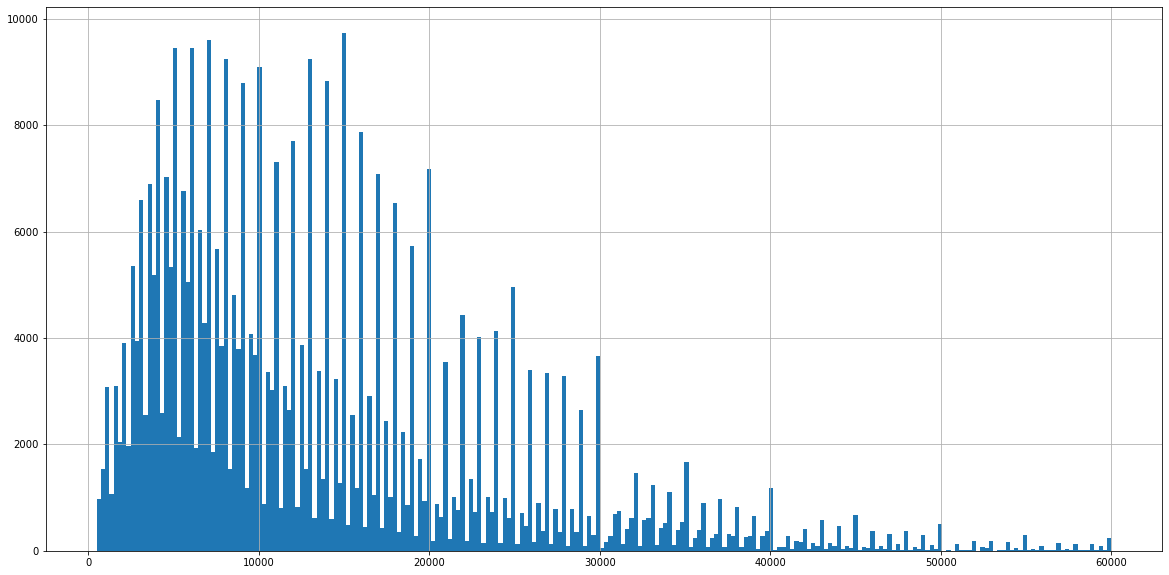

In [71]:
plt.figure(figsize = (20,10))
df_clean[(df_clean['price'] < 60000) & (df_clean['price'] > 500)]['price'].hist(bins = 240)
# plt.xticks(list(np.linspace(0,60000,60)));

Decided to limit our observations to prices between 500 and 60,000 dollars. 500 was picked as our lower limit because we noticed that a lot of prices under this value were for monthly installments. We picked 60,000 as our upper limit to remove outliers and a small percentage of of our data was greater than 60,000.

In [72]:
df_clean[(df_clean['price'] < 60000) & (df_clean['price'] > 500)].shape

(392466, 26)

In [73]:
df_clean.shape

(434732, 26)

In [74]:
df_clean = df_clean[(df_clean['price'] < 60000) & (df_clean['price'] > 500)].copy()

In [75]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      7229
model             5412
condition            0
cylinders            0
fuel              1966
odometer             0
title_status      1374
transmission      1316
vin                  0
drive                0
size            242074
type                 0
paint_color          0
image_url            0
description          2
county          392466
state                0
lat               3344
long              3344
age                  0
dtype: int64

### Feature engineering

In [76]:
(df_clean["description"].str.contains("project", case = False)).sum()

6691

In [77]:
(df_clean["description"].str.contains("parts", case = False)).sum()

10738

In [78]:
(df_clean["description"].str.contains("buying", case = False)).sum()

52294

In [79]:
df_clean.drop(columns = ['county'], inplace = True)

In [80]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer      7229
model             5412
condition            0
cylinders            0
fuel              1966
odometer             0
title_status      1374
transmission      1316
vin                  0
drive                0
size            242074
type                 0
paint_color          0
image_url            0
description          2
state                0
lat               3344
long              3344
age                  0
dtype: int64

In [81]:
df_clean.drop(columns = ['size'], inplace = True)

In [84]:
df_clean.isnull().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer    7229
model           5412
condition          0
cylinders          0
fuel            1966
odometer           0
title_status    1374
transmission    1316
vin                0
drive              0
type               0
paint_color        0
image_url          0
description        2
state              0
lat             3344
long            3344
age                0
dtype: int64

In [85]:
df_clean.shape

(392466, 24)

In [86]:
df_clean['model'].head(40)

0                         patriot
1                    328i m-sport
2                         caravan
3                     colorado ls
7             mustang convertible
9       odyssey ex-l, reliable, e
10       tacoma sr v6 - trd off r
11                        compass
12       silverado 2500hd ext cab
14                        liberty
15                       suburban
16                   titan pro-4x
17      e-series cargo e-250 work
18       tacoma sr v6, 6" lift, x
19           outback 2.5i limited
20                        journey
22                            NaN
23       tacoma v6 - 4dr, 4wd dou
24       tundra sr5, new wheels a
25     fiesta se, reliable, commu
26                            bug
27                         impala
28        fj cruiser 4dr suv 4x4,
29                 grand cherokee
30    m3 manual transmission, exc
31                           cr-v
32                 corvette coupe
33       tacoma sr v6 4x4, excell
35                           740i
36            

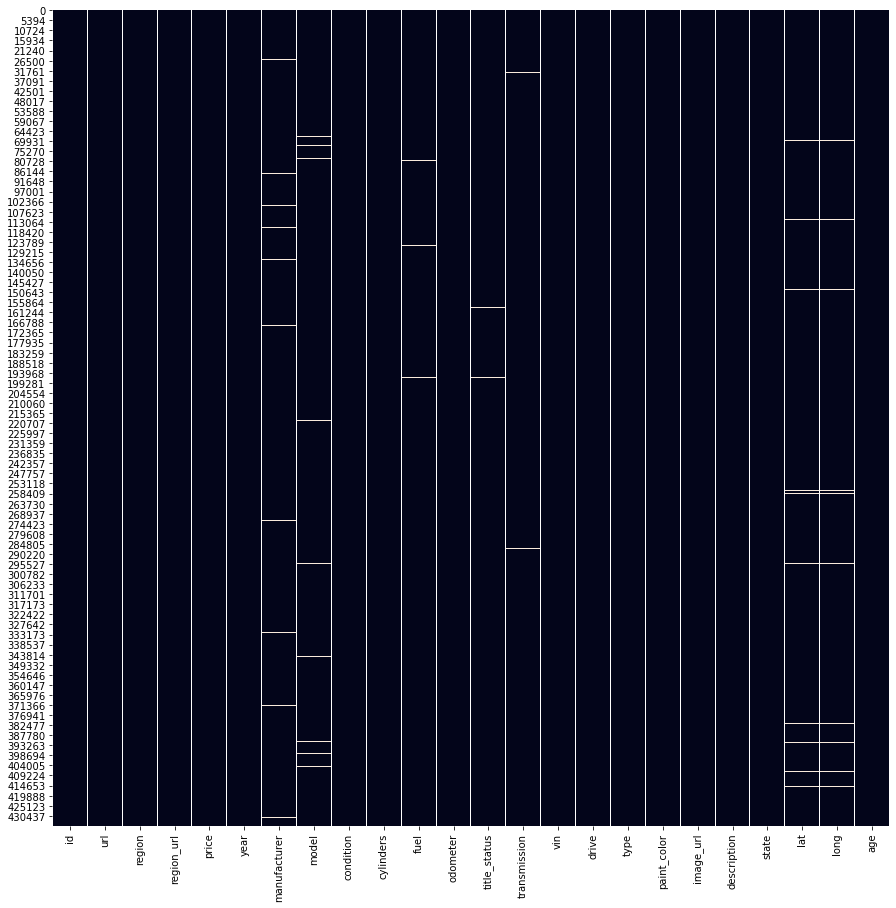

In [90]:
plt.figure(figsize = (15,15))
sns.heatmap(df_clean.isnull(), cbar=False)

discuss why we kept cars with same vin being sold in diff states

In [91]:
df_clean.drop(columns = 'model', inplace = True)

In [92]:
df_clean.isnull().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer    7229
condition          0
cylinders          0
fuel            1966
odometer           0
title_status    1374
transmission    1316
vin                0
drive              0
type               0
paint_color        0
image_url          0
description        2
state              0
lat             3344
long            3344
age                0
dtype: int64

In [95]:
df_clean.dropna(axis = 0, subset = ['manufacturer'], inplace = True)

In [98]:
df_clean.shape

(385237, 23)

In [96]:
df_clean.isnull().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
condition          0
cylinders          0
fuel            1961
odometer           0
title_status    1374
transmission    1316
vin                0
drive              0
type               0
paint_color        0
image_url          0
description        2
state              0
lat             3242
long            3242
age                0
dtype: int64

In [99]:
df_clean.dropna(axis = 0, inplace = True)

In [100]:
import pickle

In [101]:
import pickle

with open('df_clean.pickle', 'wb') as handle:
    pickle.dump(df_clean, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

In [102]:
with open('df_clean.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [104]:
b.head()

,id,url,region,region_url,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,type,paint_color,image_url,description,state,lat,long,age
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,like new,4 cylinders,gas,73904.0,clean,automatic,0,4wd,convertible,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690,10.0
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,good,8 cylinders,gas,76237.0,clean,automatic,0,rwd,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,or,46.1837,-123.8240,8.0
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,excellent,6 cylinders,gas,199000.0,clean,automatic,0,fwd,truck,orange,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",sc,34.9352,-81.9654,21.0
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,excellent,5 cylinders,gas,54000.0,clean,automatic,1,rwd,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",az,34.4783,-114.2710,18.0
7,7120430837,https://maine.craigslist.org/cto/d/gardiner-20...,maine,https://maine.craigslist.org,8500,2005.0,ford,excellent,6 cylinders,gas,62800.0,clean,automatic,1,rwd,convertible,silver,https://images.craigslist.org/00Y0Y_48vTuTqSFD...,2005 Ford Mustang Premium Convertible First ye...,me,44.2070,-69.7858,17.0
